In [1]:
import scipy
import scipy.cluster.hierarchy as sch
import pandas as pd
import scipy.cluster.hierarchy as spc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
def plot_corr(corr, size=10):    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

    for (i, j), z in pd.np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)
    return ax

In [7]:
def run_hc(linkage_method, corr_method, cutoff='1996'):
    # %% load data
    df = pd.read_excel('./inputs/Industrial Returns.xlsx', index_col=0)
    # format field names so they're more compact
    df.columns = df.columns.str.replace('QIS - ', '').str.replace(' \(all\)', '')
        
    # %% creating the panel rank
    
    X = df[cutoff:].rank(axis=1).corr(corr_method)
    d = sch.distance.pdist(X.values)
    L = sch.linkage(d, method=linkage_method)
    dendro = sch.dendrogram(L, leaf_rotation=90, labels=df.columns)
    
    if cutoff == '1996':
        title_str = 'full'
    else:
        title_str = 'since %s' % cutoff
    
    plt.title('%s %s' % (linkage_method, title_str))
            
    ind = sch.fcluster(L, 0.5 * d.max(), 'distance')
    columns = [df.columns.tolist()[i] for i in list((pd.np.argsort(ind)))]
    df_aux = X.reindex(columns, axis=1)
    corr_ax = plot_corr(X, 11)
    plt.title('%s %s' % (linkage_method, title_str), y = 1.2)
    plt.show()

#     sns.clustermap(df_aux, metric="euclidean", method="ward", cmap=sns.light_palette((210, 90, 60), input="husl"), standard_scale=1, yticklabels= True)
#     plt.show()
    
    return X, d, L

In [8]:
# %% params
#  IMPORTANT: CENTROID, MEDIAN AND WARD METHODS REQUIRE EUCLIDEAN DISTANCE TO WORK PROPERLY
linkage_method = 'ward'
# for corr we could do spearman, pearson or kendall
corr_method = 'kendall'

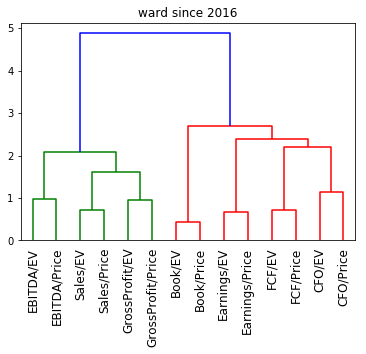

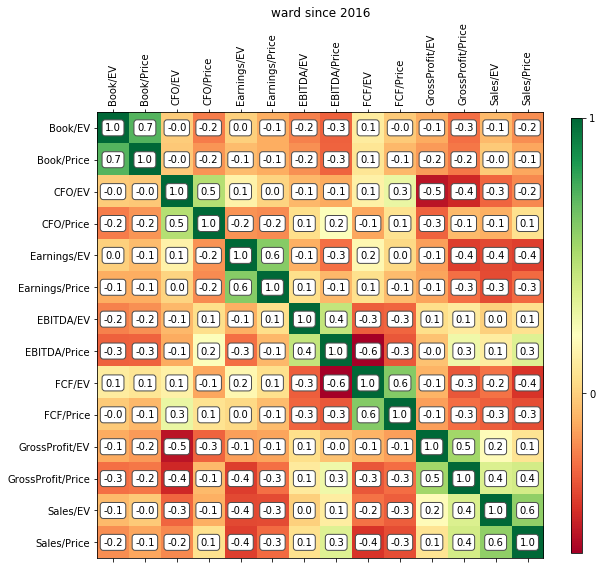

In [9]:
X, d, L = run_hc(linkage_method, corr_method, '2016')

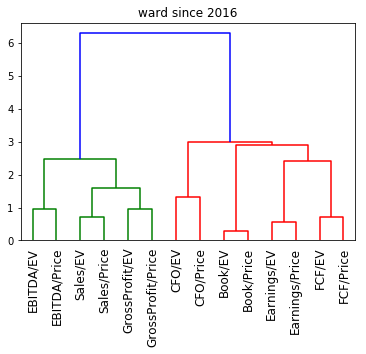

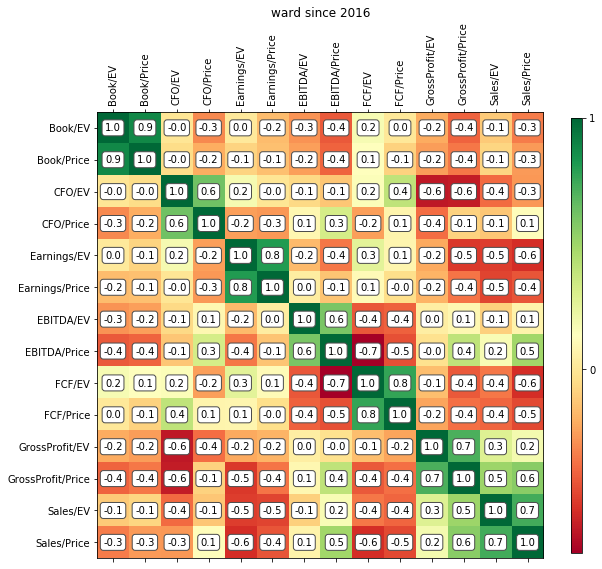

In [10]:
X, d, L = run_hc(linkage_method, 'pearson', '2016')

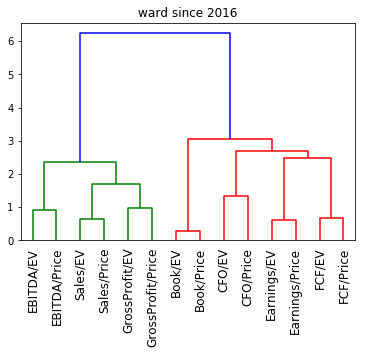

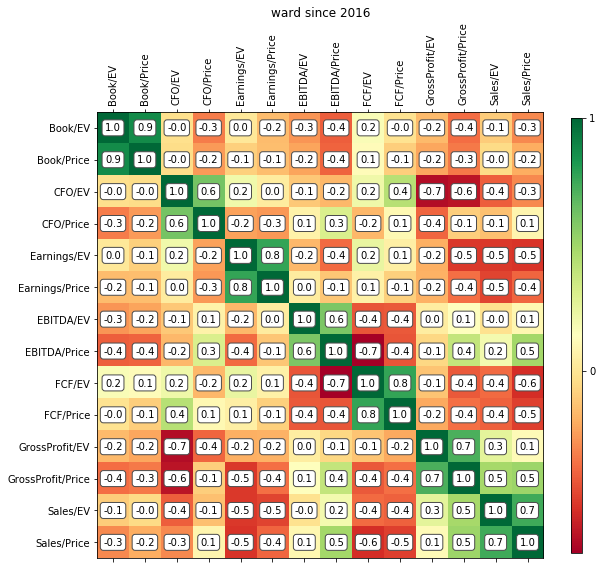

In [11]:
X, d, L = run_hc(linkage_method, 'spearman', '2016')

In [14]:
# second file, exposures
df_csv = pd.read_csv('./inputs/indu_value_exposures.csv')

In [16]:
targets = ['FCF/EV', 'FCF/Price', 'Earnings/EV', 'Earnings/Price']
# format field names so they're more compact
df_csv.columns = df_csv.columns.str.replace('QIS - ', '').str.replace(' \(all\)', '')
df_csv = df_csv.drop(df_csv.columns[1], axis=1)
df_csv['Date'] = pd.to_datetime(df_csv['Date']).dt.date
grouper = df_csv.groupby('Date')
corr_dict = {}
eric_rules = pd.DataFrame(columns=df_csv.drop('Date', axis=1).columns)

In [17]:
for g in grouper:
    corr_dict[g[0]] = g[1].rank(axis=1).corr('kendall')['CFO/EV']
    eric_rules.loc[pd.to_datetime(g[0])] = corr_dict[g[0]]

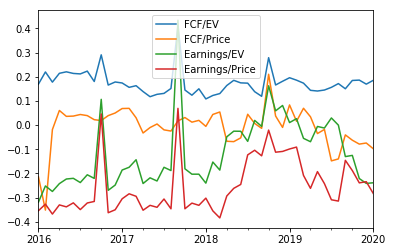

In [18]:
# plot the results
eric_rules['2016':][targets].plot()
plt.show()